<style type="text/css">
    ol { list-style-type: upper-alpha; }
    p { text-align: center; font-weight: bold; }
</style>

<center>
  <img src=https://i.imgur.com/0TSSaqL.png width="550">
</center>
<center>
  <h3>
<b>CAPSTONE</b><br/><br/>
    <b>Predict H1N1 and Seasonal Flu Vaccines</b><br/><br/>
    <b>GRUPO 3 - Modeling</b><br/><br/>
    <b>Split 70%-30% - All Variables</b>  
  </h3>
</center>

# Contexto

El objetivo es predecir si una persona fue vacunada con la vacuna H1N1 o gripe estacional, de acuerdo a información compartida acerca de su contexto, opiniones y comportamientos a nivel salud.

Después de la fase de EDA (Exploratory Data Analysis), nos quedamos con 32 de las 36 características iniciales:

For all binary variables: 0 = No; 1 = Yes.

*   `h1n1_concern` - Level of concern about the H1N1 flu.
  *   0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
*   `h1n1_knowledge` - Level of knowledge about H1N1 flu.
  *   0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
*   `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
*   `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
*   `behavioral_face_mask` - Has bought a face mask. (binary)
*   `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
*   `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
*   `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
*   `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
*   `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
*   `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
*   `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
*   `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
*   `health_worker` - Is a healthcare worker. (binary)
*   `health_insurance` - Has health insurance. (binary)
*   `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
  *   1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
     1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `age_group` - Age group of respondent.
*   `education` - Self-reported education level.
*   `race` - Race of respondent.
*   `sex` - Sex of respondent.
*   `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
*   `marital_status` - Marital status of respondent.
*   `rent_or_own` - Housing situation of respondent.
*   `employment_status` - Employment status of respondent.
*   `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
*   `household_adults` - Number of other adults in household, top-coded to 3.
*   `household_children` - Number of children in household, top-coded to 3.

# 1. Preparación

En esta fase vamos a cargar y preparar el dataset resultante de la fase de EDA (Exploratory Data Analysis).

Primero importamos las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

plt.style.use('ggplot')

RANDOM_SEED = 42    # Set a random seed for reproducibility!

In [2]:
def print_metrics(y_test, y_pred_result):
  print("Accuracy:", "{:10.4f}".format(accuracy_score(y_test, y_pred_result, normalize=True)))
  print("Precision:", "{:10.4f}".format(precision_score(y_test, y_pred_result)))
  print("Recall:", "{:10.4f}".format(recall_score(y_test, y_pred_result)))
  print("\n", classification_report(y_test, y_pred_result))

In [3]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
)

Cargamos el dataset y exploramos su estructura y datos.

In [4]:
features_df = pd.read_csv('training_set_features_eda_notnulls.csv', index_col="respondent_id")
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status_0,marital_status_1,rent_or_own_0,rent_or_own_1,employment_status_0,employment_status_1,employment_status_2,census_msa_0,census_msa_1,census_msa_2
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


El dataset tiene 26707 filas y 48 columnas.

In [5]:
features_df.shape

(26707, 48)

Tipos de datos por columna:

In [6]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
age_group_0                    float64
age_group_1                    float64
age_group_2              

In [7]:
features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status_0,marital_status_1,rent_or_own_0,rent_or_own_1,employment_status_0,employment_status_1,employment_status_2,census_msa_0,census_msa_1,census_msa_2
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,0.560265,0.439735,0.777998,0.222002,0.562512,0.383083,0.054405,0.436028,0.294455,0.269517
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,0.496364,0.496364,0.415600,0.415600,0.496086,0.486147,0.226820,0.495900,0.455806,0.443717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
labels_df = pd.read_csv("training_set_labels.csv", index_col="respondent_id")
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


# Split training y evaluation set

In [9]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.30,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

y_train_h1n1 = y_train[['h1n1_vaccine']].copy()
y_train_seasonal = y_train[['seasonal_vaccine']].copy()
y_eval_h1n1 = y_eval[['h1n1_vaccine']].copy()
y_eval_seasonal = y_eval[['seasonal_vaccine']].copy()

# 2. Hyperparameters tuning con GridSearchCV

In [10]:
params_result = pd.DataFrame()

## Naive Bayes

### H1N1

In [11]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

naive_h1n1_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring="roc_auc", verbose=1, cv=10, n_jobs=-1)
naive_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(naive_h1n1_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.02848035868435802)


In [12]:
naive_params_result = pd.DataFrame({'estimator':'naive','target':'h1n1',
                                    'params':naive_h1n1_grid.best_params_,
                                    'score':naive_h1n1_grid.best_score_})
params_result = pd.concat([params_result, naive_params_result])
naive_params_result

,estimator,target,params,score
var_smoothing,naive,h1n1,0.02848,0.80998


### Seasonal

In [13]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

naive_seasonal_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring="roc_auc", verbose=1, cv=10, n_jobs=-1)
naive_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(naive_seasonal_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0533669923120631)


In [14]:
naive_params_result = pd.DataFrame({'estimator':'naive','target':'seasonal',
                            'params':naive_seasonal_grid.best_params_,
                            'score':naive_seasonal_grid.best_score_})
params_result = pd.concat([params_result, naive_params_result])
naive_params_result

,estimator,target,params,score
var_smoothing,naive,seasonal,0.053367,0.816363


## Logistic Regression

### H1N1

In [15]:
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100],
    'solver': ['lbfgs','saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

lr = LogisticRegression()
lr_h1n1_grid = GridSearchCV(lr, param_grid, cv=10, scoring="roc_auc", verbose=1)
lr_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(lr_h1n1_grid.best_estimator_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
LogisticRegression(C=0.5, multi_class='multinomial')


In [16]:
lr_params_result = pd.DataFrame({'estimator':'lr','target':'h1n1',
                                 'params':lr_h1n1_grid.best_params_,
                                 'score':lr_h1n1_grid.best_score_})
params_result = pd.concat([params_result, lr_params_result])
lr_params_result

,estimator,target,params,score
C,lr,h1n1,0.5,0.854133
multi_class,lr,h1n1,multinomial,0.854133
penalty,lr,h1n1,l2,0.854133
solver,lr,h1n1,lbfgs,0.854133


### Seasonal

In [17]:
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100],
    'solver': ['lbfgs','saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

lr = LogisticRegression()
lr_seasonal_grid = GridSearchCV(lr, param_grid, cv=10)
lr_seasonal_grid.fit(X_train, y_train_seasonal)

print(lr_seasonal_grid.best_estimator_)

LogisticRegression(C=0.5, penalty='l1', solver='saga')


In [18]:
lr_params_result = pd.DataFrame({'estimator':'lr','target':'seasonal',
                                 'params':lr_seasonal_grid.best_params_,
                                 'score':lr_seasonal_grid.best_score_})
params_result = pd.concat([params_result, lr_params_result])
lr_params_result

,estimator,target,params,score
C,lr,seasonal,0.5,0.775169
multi_class,lr,seasonal,auto,0.775169
penalty,lr,seasonal,l1,0.775169
solver,lr,seasonal,saga,0.775169


## SVM

### H1N1

In [19]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

svm_h1n1_grid = GridSearchCV(SVC(), param_grid, refit = True, scoring="roc_auc", verbose = 3)

# fitting the model for grid search
svm_h1n1_grid.fit(X_train, y_train_h1n1)

# print best parameter after tuning
print(svm_h1n1_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(svm_h1n1_grid.best_estimator_)

# print best_score after hyper-parameter tuning
print(svm_h1n1_grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=  50.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=  50.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=  49.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.715 total time=  49.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.729 total time=  50.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=  11.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=  11.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.831 total time=  11.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.835 total time=  11.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.832 total time=  11.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.845 total time=  10.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

In [20]:
svm_params_result = pd.DataFrame({'estimator':'svm','target':'h1n1',
                                  'params':svm_h1n1_grid.best_params_,
                                  'score':svm_h1n1_grid.best_score_})
params_result = pd.concat([params_result, svm_params_result])
svm_params_result

,estimator,target,params,score
C,svm,h1n1,1,0.851652
gamma,svm,h1n1,0.01,0.851652
kernel,svm,h1n1,rbf,0.851652


### Seasonal

In [21]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

svm_seasonal_grid = GridSearchCV(SVC(), param_grid, refit = True, scoring="roc_auc", verbose = 3)

# fitting the model for grid search
svm_seasonal_grid.fit(X_train, y_train_seasonal)

# print best parameter after tuning
print(svm_seasonal_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(svm_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.743 total time=  37.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.751 total time=  38.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=  38.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=  39.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.745 total time=  38.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=  16.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.843 total time=  16.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.841 total time=  16.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.848 total time=  17.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.848 total time=  17.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.838 total time=  15.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

In [22]:
svm_params_result = pd.DataFrame({'estimator':'svm','target':'seasonal',
                                  'params':svm_seasonal_grid.best_params_,
                                  'score':svm_seasonal_grid.best_score_})
params_result = pd.concat([params_result, svm_params_result])
svm_params_result

,estimator,target,params,score
C,svm,seasonal,1,0.854065
gamma,svm,seasonal,0.01,0.854065
kernel,svm,seasonal,rbf,0.854065


## DecisionTreeClassifier

### H1N1

In [23]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_h1n1_grid = GridSearchCV(dt, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
dt_h1n1_grid.fit(X_train, y_train_h1n1)

print(dt_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=42)


In [24]:
df_params_result = pd.DataFrame({'estimator':'dt','target':'h1n1',
                                 'params':dt_h1n1_grid.best_params_,
                                 'score':dt_h1n1_grid.best_score_})
params_result = pd.concat([params_result, df_params_result])
df_params_result

,estimator,target,params,score
ccp_alpha,dt,h1n1,0.001,0.807349
criterion,dt,h1n1,entropy,0.807349
max_depth,dt,h1n1,9,0.807349
max_features,dt,h1n1,auto,0.807349


### Seasonal

In [25]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_seasonal_grid = GridSearchCV(dt, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
dt_seasonal_grid.fit(X_train, y_train_seasonal)

print(dt_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='auto', random_state=42)


In [26]:
df_params_result = pd.DataFrame({'estimator':'dt','target':'seasonal',
                                 'params':dt_seasonal_grid.best_params_,
                                 'score':dt_seasonal_grid.best_score_})
params_result = pd.concat([params_result, df_params_result])
df_params_result

,estimator,target,params,score
ccp_alpha,dt,seasonal,0.001,0.792845
criterion,dt,seasonal,entropy,0.792845
max_depth,dt,seasonal,8,0.792845
max_features,dt,seasonal,auto,0.792845


## KNeighbors

### H1N1

In [27]:
param_grid = {
    'n_neighbors': list(range(1, 31))
}

kn = KNeighborsClassifier()
kn_h1n1_grid = GridSearchCV(kn, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
kn_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(kn_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNeighborsClassifier(n_neighbors=30)


In [28]:
kn_params_result = pd.DataFrame({'estimator':'kn','target':'h1n1',
                                 'params':kn_h1n1_grid.best_params_,
                                 'score':kn_h1n1_grid.best_score_})
params_result = pd.concat([params_result, kn_params_result])
kn_params_result

,estimator,target,params,score
n_neighbors,kn,h1n1,30,0.803284


### Seasonal

In [29]:
param_grid = {
    'n_neighbors': list(range(1, 31))
}

kn = KNeighborsClassifier()
kn_seasonal_grid = GridSearchCV(kn, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
kn_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(kn_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNeighborsClassifier(n_neighbors=30)


In [30]:
kn_params_result = pd.DataFrame({'estimator':'kn','target':'seasonal',
                                 'params':kn_seasonal_grid.best_params_,
                                 'score':kn_seasonal_grid.best_score_})
params_result = pd.concat([params_result, kn_params_result])
kn_params_result

,estimator,target,params,score
n_neighbors,kn,seasonal,30,0.821667


## RandomForest

### H1N1

In [31]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf_h1n1_grid = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
rf_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(rf_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)


In [32]:
rf_params_result = pd.DataFrame({'estimator':'rf','target':'h1n1',
                                 'params':rf_h1n1_grid.best_params_,
                                 'score':rf_h1n1_grid.best_score_})
params_result = pd.concat([params_result, rf_params_result])
rf_params_result

,estimator,target,params,score
criterion,rf,h1n1,entropy,0.852615
max_depth,rf,h1n1,8,0.852615
max_features,rf,h1n1,auto,0.852615
n_estimators,rf,h1n1,500,0.852615


### Seasonal

In [33]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf_seasonal_grid = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
rf_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(rf_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)


In [34]:
rf_params_result = pd.DataFrame({'estimator':'rf','target':'seasonal',
                                 'params':rf_seasonal_grid.best_params_,
                                 'score':rf_seasonal_grid.best_score_})
params_result = pd.concat([params_result, rf_params_result])
rf_params_result

,estimator,target,params,score
criterion,rf,seasonal,gini,0.849205
max_depth,rf,seasonal,8,0.849205
max_features,rf,seasonal,auto,0.849205
n_estimators,rf,seasonal,500,0.849205


# 3. Training models

**Mejor algoritmo H1N1:**

* LogisticRegression
* RandomForest
* SVM

**Mejor algoritmo Seasonal:**

* SVM
* LogisticRegression
* K-Neighbors

In [35]:
params_result[params_result['target'] == 'h1n1'].sort_values(by="score", ascending=False)

,estimator,target,params,score
multi_class,lr,h1n1,multinomial,0.854133
penalty,lr,h1n1,l2,0.854133
solver,lr,h1n1,lbfgs,0.854133
C,lr,h1n1,0.5,0.854133
n_estimators,rf,h1n1,500,0.852615
criterion,rf,h1n1,entropy,0.852615
max_features,rf,h1n1,auto,0.852615
max_depth,rf,h1n1,8,0.852615
C,svm,h1n1,1,0.851652
gamma,svm,h1n1,0.01,0.851652


In [36]:
params_result[params_result['target'] == 'seasonal'].sort_values(by="score", ascending=False)

,estimator,target,params,score
C,svm,seasonal,1,0.854065
gamma,svm,seasonal,0.01,0.854065
kernel,svm,seasonal,rbf,0.854065
n_estimators,rf,seasonal,500,0.849205
max_features,rf,seasonal,auto,0.849205
max_depth,rf,seasonal,8,0.849205
criterion,rf,seasonal,gini,0.849205
n_neighbors,kn,seasonal,30,0.821667
var_smoothing,naive,seasonal,0.053367,0.816363
criterion,dt,seasonal,entropy,0.792845


In [12]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children' 'age_group_0' 'age_group_1' 'age_group_2'
 'age_group_3' 'age_group_4' 'education_0' 'education_1' 'education_2'
 'education_3' 'race_0' 'race_1' 'race_2' 'race_3' 'sex_0' 'sex_1'
 'marital_status_0' 'marital_status_1' 'rent_or_own_0' 'rent_or_own_1'
 'employment_status_0' 'employment_status_1' 'employment_status_2'
 'census_msa_0' 'census_msa_1' 'census_msa_2']


In [13]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

## H1N1

### Algoritmo 1: LogisticRegression

In [39]:
estimator_lr_h1n1 = LogisticRegression(C=0.5, solver='saga', multi_class='multinomial', penalty='l1')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_lr_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [40]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_lr_h1n1 = full_pipeline.predict_proba(X_eval)
preds_lr_h1n1

array([[0.97844515, 0.02155485],
       [0.80758861, 0.19241139],
       [0.98733153, 0.01266847],
       ...,
       [0.55598861, 0.44401139],
       [0.27247099, 0.72752901],
       [0.91394444, 0.08605556]])

In [41]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lr_h1n1[:, 1].round())

Accuracy:     0.8490
Precision:     0.7150
Recall:     0.4806

               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6311
           1       0.72      0.48      0.57      1702

    accuracy                           0.85      8013
   macro avg       0.79      0.71      0.74      8013
weighted avg       0.84      0.85      0.84      8013



In [42]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_lr_h1n1[:, 1]):.6f}")

AUC = 0.853926


In [43]:
y_preds_lr_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lr_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_lr_h1n1.shape)
y_preds_lr_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.021555
3586,0.192411
14114,0.012668
2426,0.960918
13147,0.138110


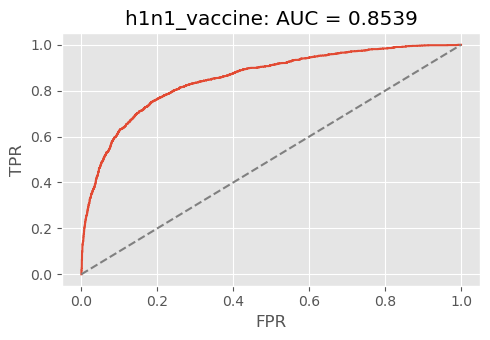

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lr_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[5985  326]
 [ 884  818]]


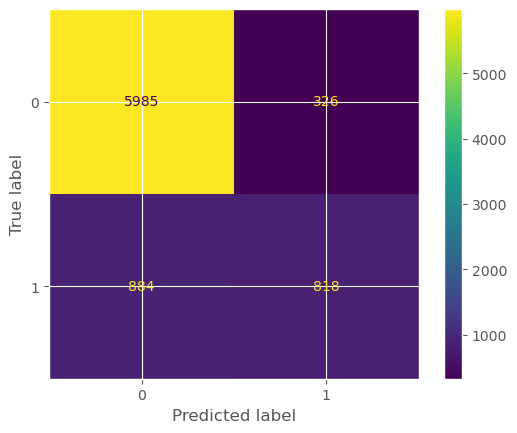

In [45]:
cm = confusion_matrix(y_eval_h1n1, preds_lr_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_lr_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 2: RandomForest

In [46]:
estimator_rf_h1n1 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto', max_depth=8, random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rf_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [47]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_rf_h1n1 = full_pipeline.predict_proba(X_eval)
preds_rf_h1n1

array([[0.95287882, 0.04712118],
       [0.76440964, 0.23559036],
       [0.95063728, 0.04936272],
       ...,
       [0.54145041, 0.45854959],
       [0.48568377, 0.51431623],
       [0.86847892, 0.13152108]])

In [48]:
print_metrics(y_eval_h1n1, preds_rf_h1n1[:, 1].round())

Accuracy:     0.8443
Precision:     0.8051
Recall:     0.3519

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      6311
           1       0.81      0.35      0.49      1702

    accuracy                           0.84      8013
   macro avg       0.83      0.66      0.70      8013
weighted avg       0.84      0.84      0.82      8013



In [49]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rf_h1n1[:, 1]):.6f}")

AUC = 0.856697


In [50]:
y_preds_rf_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rf_h1n1[:, 1],
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_rf_h1n1.shape)
y_preds_rf_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.047121
3586,0.235590
14114,0.049363
2426,0.823410
13147,0.154139


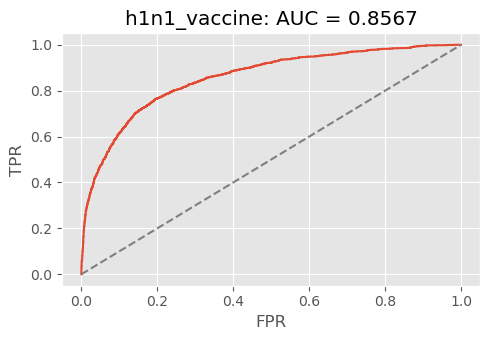

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_h1n1['h1n1_vaccine'],
    y_preds_rf_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[6166  145]
 [1103  599]]


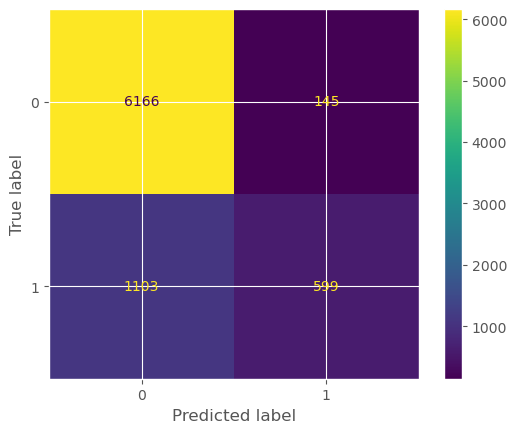

In [52]:
cm = confusion_matrix(y_eval_h1n1, preds_rf_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rf_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 3: SVM

In [53]:
estimator_svm_h1n1 = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svm_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_sta

In [54]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_svm_h1n1 = full_pipeline.predict_proba(X_eval)
preds_svm_h1n1

array([[0.91944841, 0.08055159],
       [0.816839  , 0.183161  ],
       [0.91225415, 0.08774585],
       ...,
       [0.63644236, 0.36355764],
       [0.1063222 , 0.8936778 ],
       [0.89989924, 0.10010076]])

In [55]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_svm_h1n1[:, 1].round())

Accuracy:     0.8506
Precision:     0.7463
Recall:     0.4495

               precision    recall  f1-score   support

           0       0.87      0.96      0.91      6311
           1       0.75      0.45      0.56      1702

    accuracy                           0.85      8013
   macro avg       0.81      0.70      0.74      8013
weighted avg       0.84      0.85      0.84      8013



In [56]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_svm_h1n1[:, 1]):.6f}")

AUC = 0.846443


In [57]:
y_preds_svm_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svm_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_svm_h1n1.shape)
y_preds_svm_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.080552
3586,0.183161
14114,0.087746
2426,0.995832
13147,0.110820


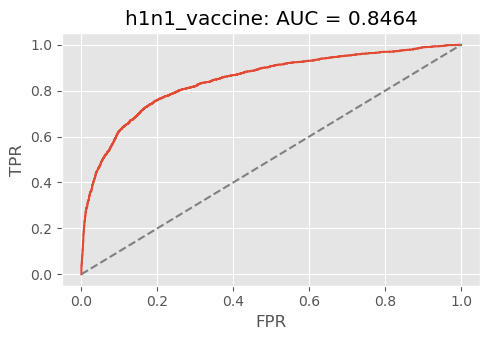

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svm_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[6051  260]
 [ 937  765]]


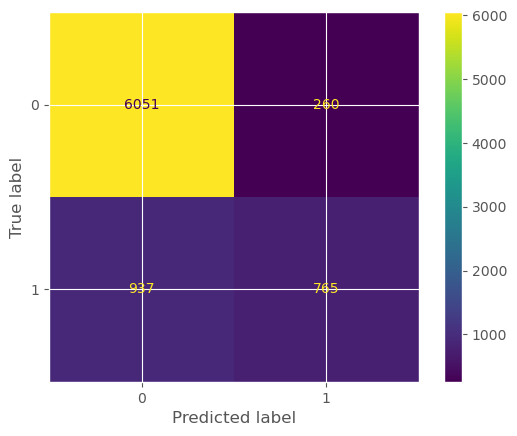

In [59]:
cm = confusion_matrix(y_eval_h1n1, preds_svm_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svm_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 4: LogisticRegression Balanced

In [60]:
estimator_lrb_h1n1 = LogisticRegression(C=0.5, solver='saga', multi_class='multinomial', 
                                        penalty='l1', class_weight='balanced')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_lrb_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [61]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_lrb_h1n1 = full_pipeline.predict_proba(X_eval)
preds_lrb_h1n1

array([[0.91735469, 0.08264531],
       [0.53418901, 0.46581099],
       [0.95272928, 0.04727072],
       ...,
       [0.30086921, 0.69913079],
       [0.1023109 , 0.8976891 ],
       [0.75884125, 0.24115875]])

In [62]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lrb_h1n1[:, 1].round())

Accuracy:     0.7866
Precision:     0.4985
Recall:     0.7673

               precision    recall  f1-score   support

           0       0.93      0.79      0.85      6311
           1       0.50      0.77      0.60      1702

    accuracy                           0.79      8013
   macro avg       0.71      0.78      0.73      8013
weighted avg       0.84      0.79      0.80      8013



In [63]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_lrb_h1n1[:, 1]):.6f}")

AUC = 0.854038


In [64]:
y_preds_lrb_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lrb_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_lrb_h1n1.shape)
y_preds_lrb_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.082645
3586,0.465811
14114,0.047271
2426,0.988101
13147,0.360094


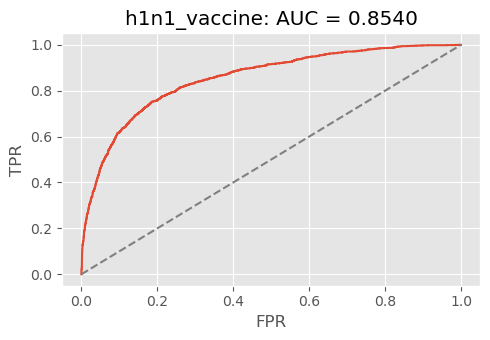

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lrb_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[4997 1314]
 [ 396 1306]]


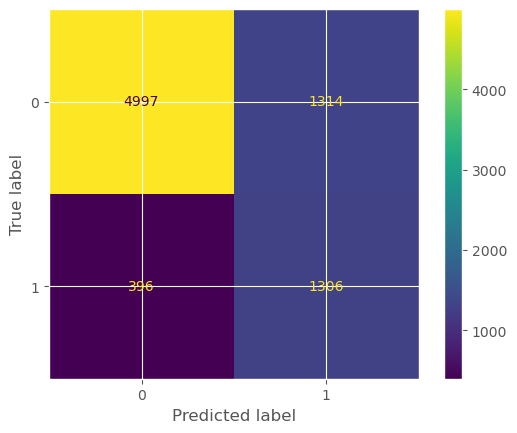

In [66]:
cm = confusion_matrix(y_eval_h1n1, preds_lrb_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_lrb_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 5: RandomForest Balanced

In [67]:
estimator_rfb_h1n1 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto', max_depth=8,
                                   class_weight='balanced', random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rfb_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator'

In [68]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_rfb_h1n1 = full_pipeline.predict_proba(X_eval)
preds_rfb_h1n1

array([[0.85316567, 0.14683433],
       [0.53933922, 0.46066078],
       [0.83968061, 0.16031939],
       ...,
       [0.30019679, 0.69980321],
       [0.25063283, 0.74936717],
       [0.66944223, 0.33055777]])

In [69]:
print_metrics(y_eval_h1n1, preds_rfb_h1n1[:, 1].round())

Accuracy:     0.8086
Precision:     0.5361
Recall:     0.7327

               precision    recall  f1-score   support

           0       0.92      0.83      0.87      6311
           1       0.54      0.73      0.62      1702

    accuracy                           0.81      8013
   macro avg       0.73      0.78      0.75      8013
weighted avg       0.84      0.81      0.82      8013



In [70]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rfb_h1n1[:, 1]):.6f}")

AUC = 0.856729


In [71]:
y_preds_rfb_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rfb_h1n1[:, 1],
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_rfb_h1n1.shape)
y_preds_rfb_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.146834
3586,0.460661
14114,0.160319
2426,0.934389
13147,0.386339


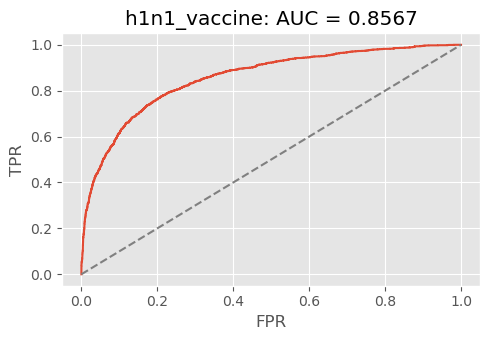

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_h1n1['h1n1_vaccine'],
    y_preds_rfb_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[5232 1079]
 [ 455 1247]]


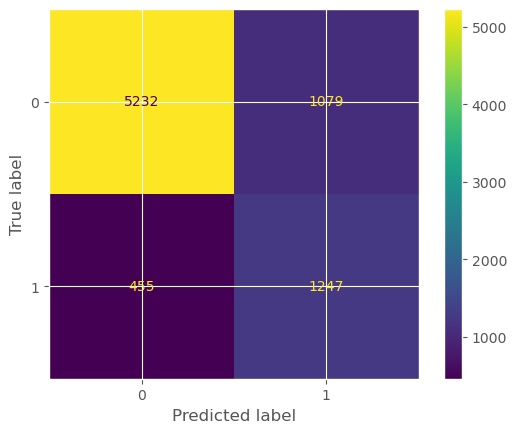

In [73]:
cm = confusion_matrix(y_eval_h1n1, preds_rfb_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rfb_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 6: SVM Balanced

In [74]:
estimator_svmb_h1n1 = SVC(C=1, gamma=0.01, kernel='rbf', probability=True, class_weight='balanced')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svmb_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [75]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_svmb_h1n1 = full_pipeline.predict_proba(X_eval)
preds_svmb_h1n1

array([[0.95924828, 0.04075172],
       [0.80431571, 0.19568429],
       [0.98120767, 0.01879233],
       ...,
       [0.46533583, 0.53466417],
       [0.31345079, 0.68654921],
       [0.93865211, 0.06134789]])

In [76]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_svmb_h1n1[:, 1].round())

Accuracy:     0.8446
Precision:     0.6903
Recall:     0.4871

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      6311
           1       0.69      0.49      0.57      1702

    accuracy                           0.84      8013
   macro avg       0.78      0.71      0.74      8013
weighted avg       0.83      0.84      0.83      8013



In [77]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_svmb_h1n1[:, 1]):.6f}")

AUC = 0.858395


In [78]:
y_preds_svmb_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svmb_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_svmb_h1n1.shape)
y_preds_svmb_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.040752
3586,0.195684
14114,0.018792
2426,0.915435
13147,0.104527


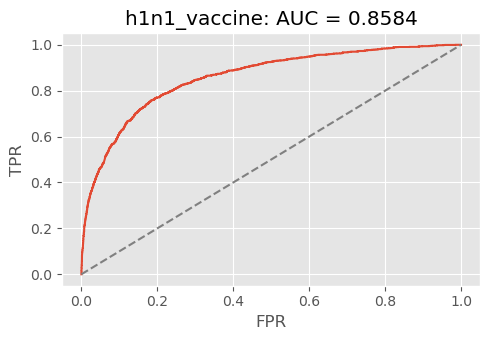

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svmb_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[5939  372]
 [ 873  829]]


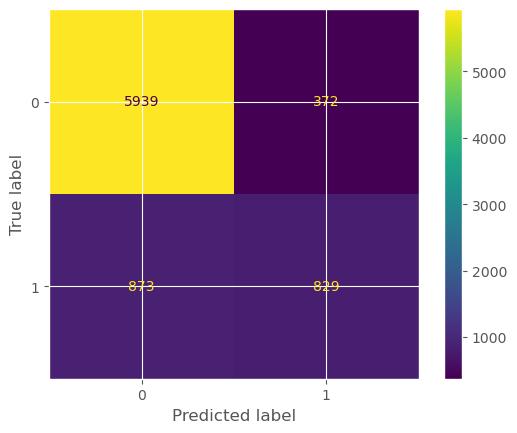

In [80]:
cm = confusion_matrix(y_eval_h1n1, preds_svmb_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svmb_h1n1.classes_)
disp.plot()
plt.show()

## Seasonal

### Algoritmo 1: SVM

In [81]:
estimator_svm_seasonal = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svm_seasonal),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_sta

In [82]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_svm_seasonal = full_pipeline.predict_proba(X_eval)
preds_svm_seasonal

array([[0.88468188, 0.11531812],
       [0.48237049, 0.51762951],
       [0.98102269, 0.01897731],
       ...,
       [0.42183305, 0.57816695],
       [0.08902536, 0.91097464],
       [0.56841972, 0.43158028]])

In [83]:
print_metrics(y_eval_seasonal, preds_svm_seasonal[:, 1].round())

Accuracy:     0.7845
Precision:     0.7884
Recall:     0.7341

               precision    recall  f1-score   support

           0       0.78      0.83      0.80      4282
           1       0.79      0.73      0.76      3731

    accuracy                           0.78      8013
   macro avg       0.78      0.78      0.78      8013
weighted avg       0.78      0.78      0.78      8013



In [84]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_svm_seasonal[:, 1]):.6f}")

AUC = 0.858146


In [85]:
y_preds_svm_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_svm_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_svm_seasonal.shape)
y_preds_svm_seasonal.head()

y_preds.shape: (8013, 1)


,seasonal_vaccine
respondent_id,
7572,0.115318
3586,0.517630
14114,0.018977
2426,0.970303
13147,0.975525


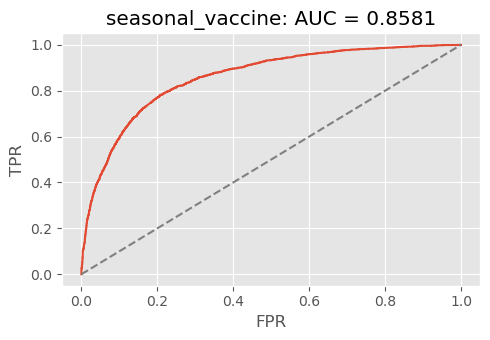

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_svm_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[3547  735]
 [ 992 2739]]


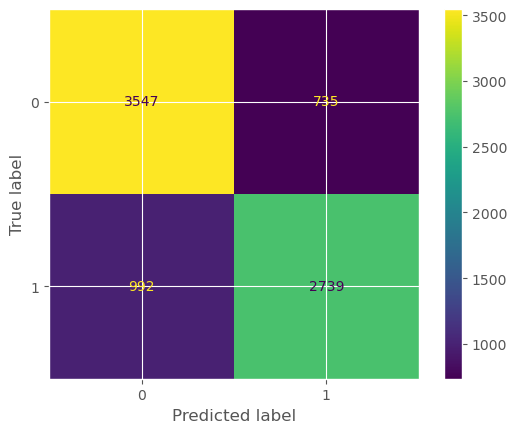

In [87]:
cm = confusion_matrix(y_eval_seasonal, preds_svm_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svm_seasonal.classes_)
disp.plot()
plt.show()

### Algoritmo 2: RandomForest

In [88]:
estimator_rf_seasonal = RandomForestClassifier(n_estimators=500, max_features='auto', max_depth=8, criterion='entropy', random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rf_seasonal),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [89]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_rf_seasonal = full_pipeline.predict_proba(X_eval)
preds_rf_seasonal

array([[0.87447543, 0.12552457],
       [0.39763154, 0.60236846],
       [0.86783887, 0.13216113],
       ...,
       [0.36314459, 0.63685541],
       [0.15352601, 0.84647399],
       [0.55808158, 0.44191842]])

In [90]:
print_metrics(y_eval_seasonal, preds_rf_seasonal[:, 1].round())

Accuracy:     0.7760
Precision:     0.7864
Recall:     0.7124

               precision    recall  f1-score   support

           0       0.77      0.83      0.80      4282
           1       0.79      0.71      0.75      3731

    accuracy                           0.78      8013
   macro avg       0.78      0.77      0.77      8013
weighted avg       0.78      0.78      0.77      8013



In [91]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rf_seasonal[:, 1]):.6f}")

AUC = 0.852969


In [92]:
y_preds_rf_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_rf_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_rf_seasonal.shape)
y_preds_rf_seasonal.head()

y_preds.shape: (8013, 1)


,seasonal_vaccine
respondent_id,
7572,0.125525
3586,0.602368
14114,0.132161
2426,0.901033
13147,0.884480


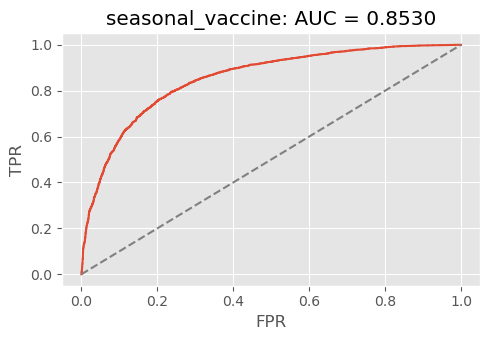

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_rf_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[3560  722]
 [1073 2658]]


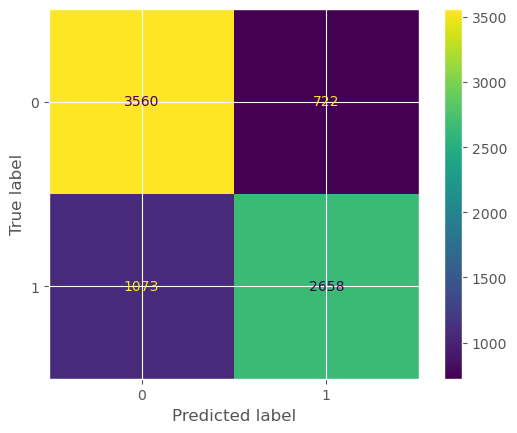

In [94]:
cm = confusion_matrix(y_eval_seasonal, preds_rf_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rf_seasonal.classes_)
disp.plot()
plt.show()

### Algoritmo 3: KNeighbors

In [95]:
estimator_kn_seasonal = KNeighborsClassifier(n_neighbors=30)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_kn_seasonal),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_sta

In [96]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_kn_seasonal = full_pipeline.predict_proba(X_eval)
preds_kn_seasonal

array([[0.9       , 0.1       ],
       [0.5       , 0.5       ],
       [0.86666667, 0.13333333],
       ...,
       [0.6       , 0.4       ],
       [0.16666667, 0.83333333],
       [0.56666667, 0.43333333]])

In [97]:
print_metrics(y_eval_seasonal, preds_kn_seasonal[:, 1].round())

Accuracy:     0.7412
Precision:     0.7566
Recall:     0.6548

               precision    recall  f1-score   support

           0       0.73      0.82      0.77      4282
           1       0.76      0.65      0.70      3731

    accuracy                           0.74      8013
   macro avg       0.74      0.74      0.74      8013
weighted avg       0.74      0.74      0.74      8013



In [98]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_kn_seasonal[:, 1]):.6f}")

AUC = 0.810601


In [99]:
y_preds_kn_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_kn_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_kn_seasonal.shape)
y_preds_kn_seasonal.head()

y_preds.shape: (8013, 1)


,seasonal_vaccine
respondent_id,
7572,0.100000
3586,0.500000
14114,0.133333
2426,0.933333
13147,0.933333


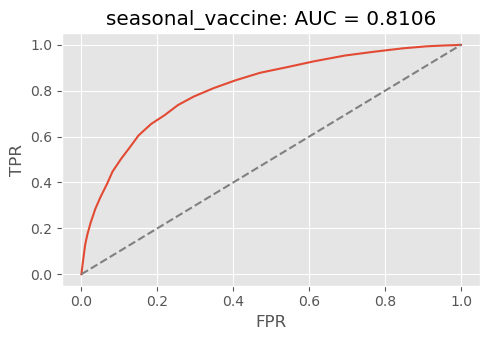

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_kn_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[3496  786]
 [1288 2443]]


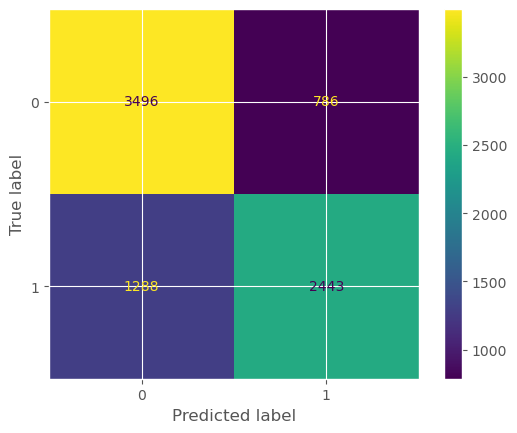

In [101]:
cm = confusion_matrix(y_eval_seasonal, preds_kn_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_kn_seasonal.classes_)
disp.plot()
plt.show()

### Algoritmo 4: SVM Balanced

In [14]:
estimator_svmb_seasonal = SVC(C=1, gamma=0.01, kernel='rbf', probability=True, class_weight='balanced')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svmb_seasonal),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [15]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_svmb_seasonal = full_pipeline.predict_proba(X_eval)
preds_svmb_seasonal

array([[0.89259237, 0.10740763],
       [0.46681895, 0.53318105],
       [0.98539293, 0.01460707],
       ...,
       [0.41734165, 0.58265835],
       [0.09727901, 0.90272099],
       [0.54750055, 0.45249945]])

In [16]:
print_metrics(y_eval_seasonal, preds_svmb_seasonal[:, 1].round())

Accuracy:     0.7856
Precision:     0.7859
Recall:     0.7416

               precision    recall  f1-score   support

           0       0.79      0.82      0.80      4282
           1       0.79      0.74      0.76      3731

    accuracy                           0.79      8013
   macro avg       0.79      0.78      0.78      8013
weighted avg       0.79      0.79      0.79      8013



In [17]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_svmb_seasonal[:, 1]):.6f}")

AUC = 0.858624


In [18]:
y_preds_svmb_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_svmb_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_svmb_seasonal.shape)
y_preds_svmb_seasonal.head()

y_preds.shape: (8013, 1)


,seasonal_vaccine
respondent_id,
7572,0.107408
3586,0.533181
14114,0.014607
2426,0.963695
13147,0.970474


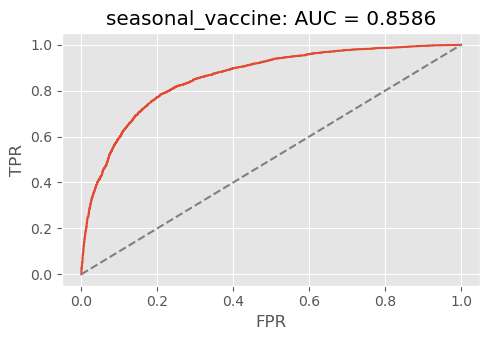

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_svmb_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[3528  754]
 [ 964 2767]]


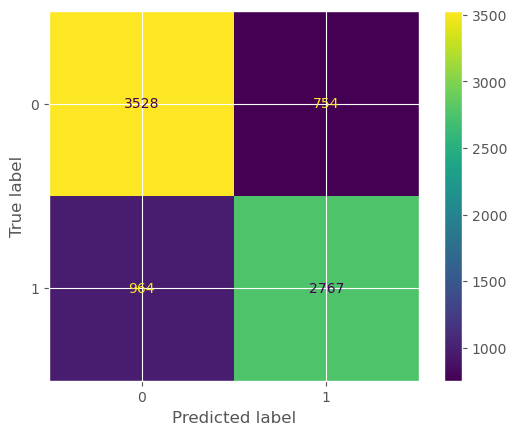

In [21]:
cm = confusion_matrix(y_eval_seasonal, preds_svmb_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svmb_seasonal.classes_)
disp.plot()
plt.show()

### Algoritmo 5: RandomForest Balanced

In [22]:
estimator_rfb_seasonal = RandomForestClassifier(n_estimators=500, max_features='auto', max_depth=8, 
                                               criterion='entropy', class_weight='balanced', random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rfb_seasonal),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator'

In [23]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_rfb_seasonal = full_pipeline.predict_proba(X_eval)
preds_rfb_seasonal

array([[0.86255465, 0.13744535],
       [0.37116361, 0.62883639],
       [0.8549363 , 0.1450637 ],
       ...,
       [0.34769239, 0.65230761],
       [0.14713346, 0.85286654],
       [0.52673006, 0.47326994]])

In [24]:
print_metrics(y_eval_seasonal, preds_rfb_seasonal[:, 1].round())

Accuracy:     0.7807
Precision:     0.7710
Recall:     0.7526

               precision    recall  f1-score   support

           0       0.79      0.81      0.80      4282
           1       0.77      0.75      0.76      3731

    accuracy                           0.78      8013
   macro avg       0.78      0.78      0.78      8013
weighted avg       0.78      0.78      0.78      8013



In [25]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rfb_seasonal[:, 1]):.6f}")

AUC = 0.853630


In [26]:
y_preds_rfb_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_rfb_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_rfb_seasonal.shape)
y_preds_rfb_seasonal.head()

y_preds.shape: (8013, 1)


,seasonal_vaccine
respondent_id,
7572,0.137445
3586,0.628836
14114,0.145064
2426,0.912984
13147,0.905190


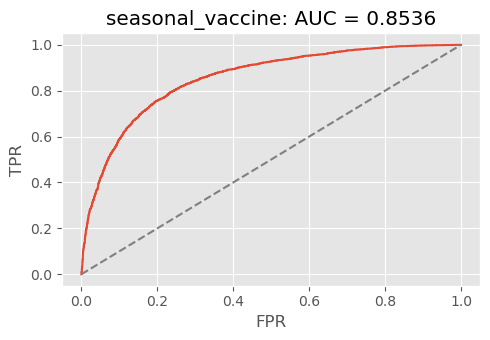

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_rfb_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[3448  834]
 [ 923 2808]]


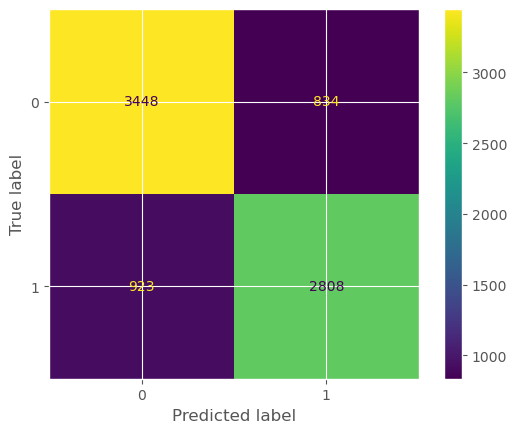

In [28]:
cm = confusion_matrix(y_eval_seasonal, preds_rfb_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rfb_seasonal.classes_)
disp.plot()
plt.show()

## MultiOutputClassifier

### Algoritmo 1: Logistic Regression

In [102]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [103]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(C=0.5, solver='saga', multi_class='multinomial', penalty='l1')
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimators

In [104]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_lr_multi = full_pipeline.predict_proba(X_eval)
preds_lr_multi

[array([[0.97844789, 0.02155211],
        [0.80756539, 0.19243461],
        [0.98733346, 0.01266654],
        ...,
        [0.55595921, 0.44404079],
        [0.27244282, 0.72755718],
        [0.91395048, 0.08604952]]),
 array([[0.93385269, 0.06614731],
        [0.56773198, 0.43226802],
        [0.98783604, 0.01216396],
        ...,
        [0.57284317, 0.42715683],
        [0.07852627, 0.92147373],
        [0.51458115, 0.48541885]])]

In [105]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lr_multi[0][:, 1].round())

Accuracy:     0.8490
Precision:     0.7150
Recall:     0.4806

               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6311
           1       0.72      0.48      0.57      1702

    accuracy                           0.85      8013
   macro avg       0.79      0.71      0.74      8013
weighted avg       0.84      0.85      0.84      8013



In [106]:
print_metrics(y_eval_seasonal, preds_lr_multi[1][:, 1].round())

Accuracy:     0.7839
Precision:     0.7845
Recall:     0.7387

               precision    recall  f1-score   support

           0       0.78      0.82      0.80      4282
           1       0.78      0.74      0.76      3731

    accuracy                           0.78      8013
   macro avg       0.78      0.78      0.78      8013
weighted avg       0.78      0.78      0.78      8013



In [107]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_lr_multi[0][:, 1]):.6f}")

AUC = 0.853925


In [108]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_lr_multi[1][:, 1]):.6f}")

AUC = 0.855329


In [109]:
y_preds_lr_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lr_multi[0][:, 1],
        "seasonal_vaccine": preds_lr_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_lr_multi.shape)
y_preds_lr_multi.head()

y_preds.shape: (8013, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
7572,0.021552,0.066147
3586,0.192435,0.432268
14114,0.012667,0.012164
2426,0.960924,0.965552
13147,0.138120,0.961893


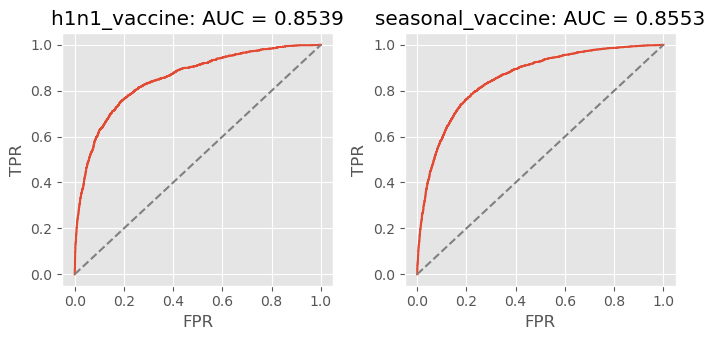

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lr_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_lr_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 2: Naive Bayes

In [111]:
estimators = MultiOutputClassifier(
    estimator=GaussianNB(var_smoothing=0.02848)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [112]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_naive_multi = full_pipeline.predict_proba(X_eval)
preds_naive_multi

[array([[9.99913842e-01, 8.61576349e-05],
        [9.80526199e-01, 1.94738007e-02],
        [9.99354336e-01, 6.45663740e-04],
        ...,
        [9.53271805e-01, 4.67281951e-02],
        [4.22670314e-03, 9.95773297e-01],
        [9.54062714e-01, 4.59372864e-02]]),
 array([[9.99943059e-01, 5.69407180e-05],
        [6.26398240e-02, 9.37360176e-01],
        [9.99754145e-01, 2.45854587e-04],
        ...,
        [9.07251604e-01, 9.27483959e-02],
        [3.45879027e-04, 9.99654121e-01],
        [8.61148556e-01, 1.38851444e-01]])]

In [113]:
print_metrics(y_eval_h1n1, preds_naive_multi[0][:, 1].round())

Accuracy:     0.7797
Precision:     0.4857
Recall:     0.6293

               precision    recall  f1-score   support

           0       0.89      0.82      0.85      6311
           1       0.49      0.63      0.55      1702

    accuracy                           0.78      8013
   macro avg       0.69      0.72      0.70      8013
weighted avg       0.81      0.78      0.79      8013



In [114]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_naive_multi[0][:, 1]):.6f}")

AUC = 0.804320


In [115]:
print_metrics(y_eval_seasonal, preds_naive_multi[1][:, 1].round())

Accuracy:     0.7351
Precision:     0.7017
Recall:     0.7497

               precision    recall  f1-score   support

           0       0.77      0.72      0.74      4282
           1       0.70      0.75      0.72      3731

    accuracy                           0.74      8013
   macro avg       0.73      0.74      0.73      8013
weighted avg       0.74      0.74      0.74      8013



In [116]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_naive_multi[1][:, 1]):.6f}")

AUC = 0.805518


In [117]:
y_preds_naive_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_naive_multi[0][:, 1],
        "seasonal_vaccine": preds_naive_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_naive_multi.shape)
y_preds_naive_multi.head()

y_preds.shape: (8013, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
7572,0.000086,0.000057
3586,0.019474,0.937360
14114,0.000646,0.000246
2426,0.999983,0.999975
13147,0.392369,0.999833


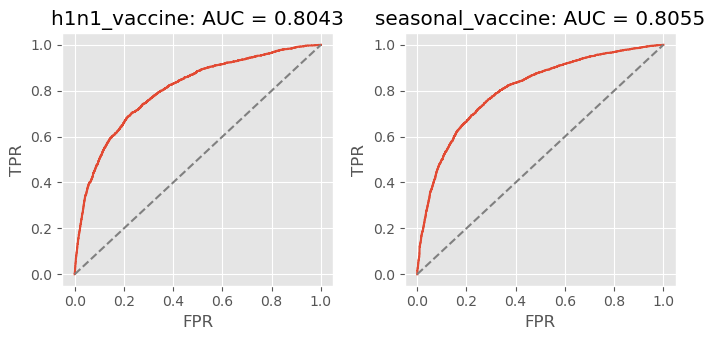

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_naive_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_naive_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 3: SVM

In [119]:
estimator_svm_multi=SVC(C=1, gamma=0.01, kernel='rbf', probability=True, class_weight='balanced')

estimators = MultiOutputClassifier(
    estimator=estimator_svm_multi
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [120]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_svm_multi = full_pipeline.predict_proba(X_eval)
preds_svm_multi

[array([[0.95887692, 0.04112308],
        [0.80449816, 0.19550184],
        [0.9809483 , 0.0190517 ],
        ...,
        [0.46787916, 0.53212084],
        [0.31646405, 0.68353595],
        [0.93827674, 0.06172326]]),
 array([[0.89101223, 0.10898777],
        [0.46738602, 0.53261398],
        [0.98489117, 0.01510883],
        ...,
        [0.41831559, 0.58168441],
        [0.09901705, 0.90098295],
        [0.54740009, 0.45259991]])]

In [121]:
print_metrics(y_eval_h1n1, preds_svm_multi[0][:, 1].round())

Accuracy:     0.8451
Precision:     0.6935
Recall:     0.4853

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      6311
           1       0.69      0.49      0.57      1702

    accuracy                           0.85      8013
   macro avg       0.78      0.71      0.74      8013
weighted avg       0.83      0.85      0.83      8013



In [122]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_svm_multi[0][:, 1]):.6f}")

AUC = 0.858396


In [123]:
print_metrics(y_eval_seasonal, preds_svm_multi[1][:, 1].round())

Accuracy:     0.7857
Precision:     0.7862
Recall:     0.7414

               precision    recall  f1-score   support

           0       0.79      0.82      0.80      4282
           1       0.79      0.74      0.76      3731

    accuracy                           0.79      8013
   macro avg       0.79      0.78      0.78      8013
weighted avg       0.79      0.79      0.79      8013



In [124]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_svm_multi[1][:, 1]):.6f}")

AUC = 0.858623


In [125]:
y_preds_svm_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svm_multi[0][:, 1],
        "seasonal_vaccine": preds_svm_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_svm_multi.shape)
y_preds_svm_multi.head()

y_preds.shape: (8013, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
7572,0.041123,0.108988
3586,0.195502,0.532614
14114,0.019052,0.015109
2426,0.913617,0.962692
13147,0.104820,0.969600


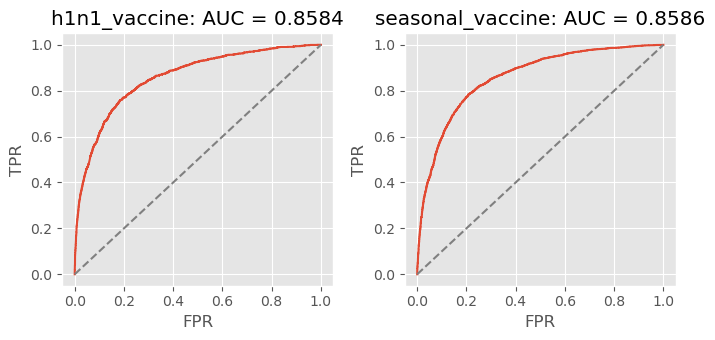

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svm_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_svm_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

[[5946  365]
 [ 876  826]]
[[3530  752]
 [ 965 2766]]


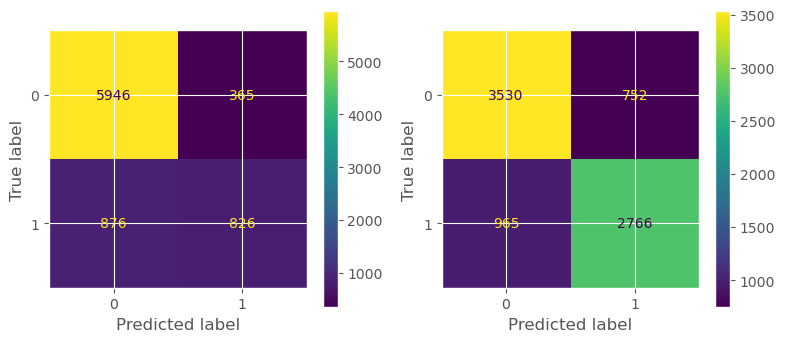

In [127]:
cm_h1n1 = confusion_matrix(y_eval_h1n1, preds_svm_multi[0][:, 1].round())
print(cm_h1n1)

cm_seasonal = confusion_matrix(y_eval_seasonal, preds_svm_multi[1][:, 1].round())
print(cm_seasonal)

disp_h1n1 = ConfusionMatrixDisplay(confusion_matrix=cm_h1n1)
disp_seasonal = ConfusionMatrixDisplay(confusion_matrix=cm_seasonal)

fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

disp_h1n1.plot(ax=ax[0])
disp_seasonal.plot(ax=ax[1])

fig.tight_layout()

### Algoritmo 4: RandomForest

In [128]:
estimators = MultiOutputClassifier(
    estimator=RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto', max_depth=8, random_state=RANDOM_SEED)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimators

In [129]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_rf_multi = full_pipeline.predict_proba(X_eval)
preds_rf_multi

[array([[0.95287882, 0.04712118],
        [0.76440964, 0.23559036],
        [0.95063728, 0.04936272],
        ...,
        [0.54145041, 0.45854959],
        [0.48568377, 0.51431623],
        [0.86847892, 0.13152108]]),
 array([[0.87447543, 0.12552457],
        [0.39763154, 0.60236846],
        [0.86783887, 0.13216113],
        ...,
        [0.36314459, 0.63685541],
        [0.15352601, 0.84647399],
        [0.55808158, 0.44191842]])]

In [130]:
print_metrics(y_eval_h1n1, preds_rf_multi[0][:, 1].round())

Accuracy:     0.8443
Precision:     0.8051
Recall:     0.3519

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      6311
           1       0.81      0.35      0.49      1702

    accuracy                           0.84      8013
   macro avg       0.83      0.66      0.70      8013
weighted avg       0.84      0.84      0.82      8013



In [131]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rf_multi[0][:, 1]):.6f}")

AUC = 0.856697


In [132]:
print_metrics(y_eval_seasonal, preds_rf_multi[1][:, 1].round())

Accuracy:     0.7760
Precision:     0.7864
Recall:     0.7124

               precision    recall  f1-score   support

           0       0.77      0.83      0.80      4282
           1       0.79      0.71      0.75      3731

    accuracy                           0.78      8013
   macro avg       0.78      0.77      0.77      8013
weighted avg       0.78      0.78      0.77      8013



In [133]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rf_multi[1][:, 1]):.6f}")

AUC = 0.852969


In [134]:
y_preds_rf_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rf_multi[0][:, 1],
        "seasonal_vaccine": preds_rf_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_rf_multi.shape)
y_preds_rf_multi.head()

y_preds.shape: (8013, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
7572,0.047121,0.125525
3586,0.235590,0.602368
14114,0.049363,0.132161
2426,0.823410,0.901033
13147,0.154139,0.884480


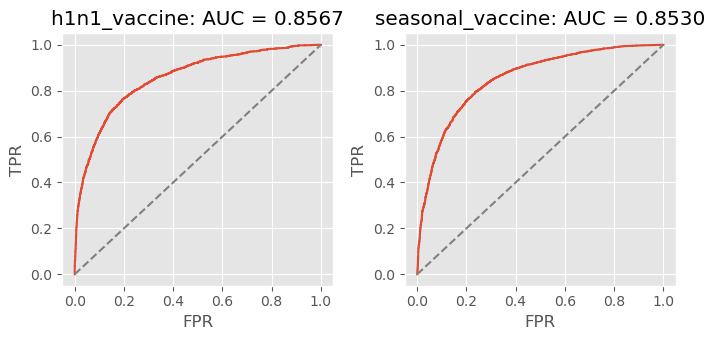

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_rf_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_rf_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

# Red Neuronal Dense

## h1n1_vaccine

585/585 [==============================] - 1s 2ms/step
ROC AUC Score: 0.8715082811031658


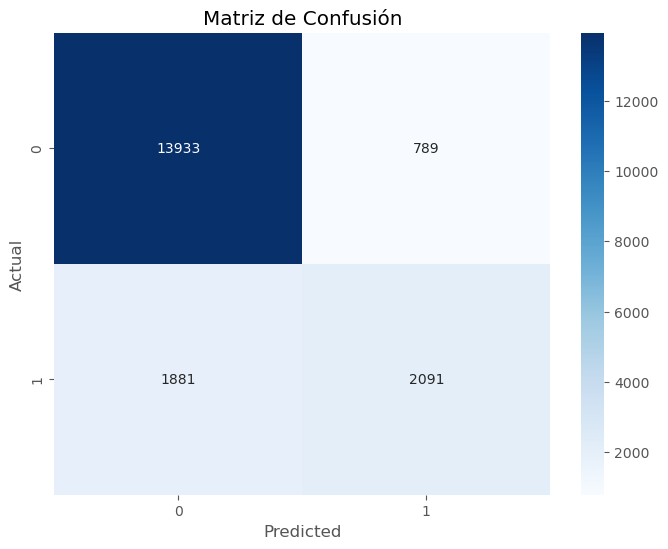

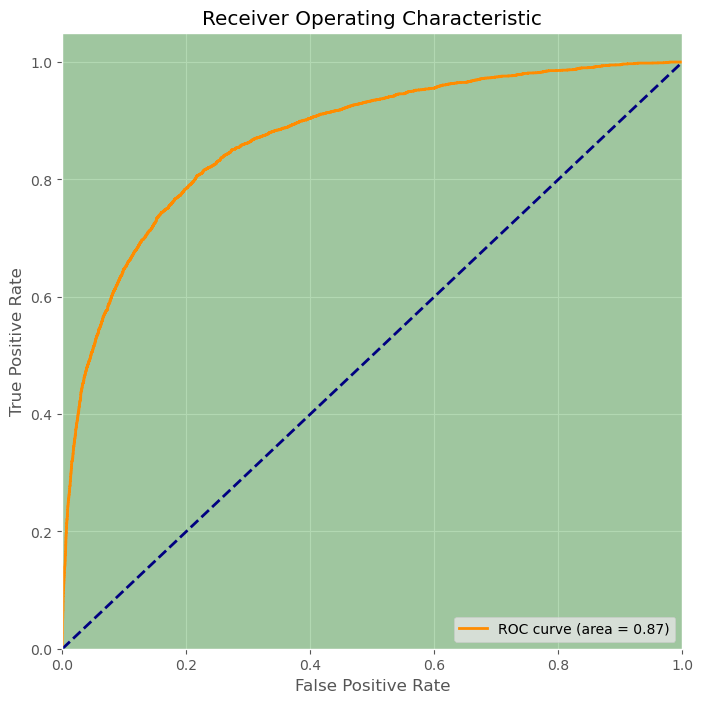

In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una función para construir el modelo
def build_model(optimizer='adam', activation='relu', hidden_units=16):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Crear un clasificador Keras para usar con GridSearchCV
model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=32, verbose=0)

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])

# Entrenar el modelo con los parámetros específicos
pipeline.fit(X_train, y_train.loc[:,'h1n1_vaccine'])

# Realizar predicciones y obtener probabilidades continuas
y_pred = pipeline.predict(X_train)
y_prob = pipeline.predict_proba(X_train)[:, 1]  # Tomamos solo la columna correspondiente a la clase positiva

# Calcular el ROC AUC Score
roc_auc = roc_auc_score(y_train.loc[:,'h1n1_vaccine'], y_prob)

# Mostrar los resultados
print("ROC AUC Score:", roc_auc)

# Calcular la tabla de confusión
threshold = 0.5  # Umbral para clasificar como positivo o negativo
y_pred = (y_prob > threshold).astype(int)
conf_matrix = confusion_matrix(y_train.loc[:,'h1n1_vaccine'], y_pred)

# Mostrar la tabla de confusión con colores
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_train.loc[:,'h1n1_vaccine'], y_prob)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Calcular los puntos de TP y TN
threshold = 0.5  # Umbral para clasificar como positivo o negativo
y_pred = (y_prob > threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_train.loc[:,'h1n1_vaccine'], y_pred).ravel()

# Agregar los rectángulos de TP y TN al gráfico
plt.gca().add_patch(plt.Rectangle((0, 0), fp, tn, color="green", alpha=0.3, label='True Negatives'))
plt.gca().add_patch(plt.Rectangle((fp, tn), tp, fn, color="red", alpha=0.3, label='True Positives'))

# Mostrar el gráfico
plt.show()

# seasonal_vaccine

585/585 [==============================] - 1s 2ms/step
ROC AUC Score: 0.8637392390092298


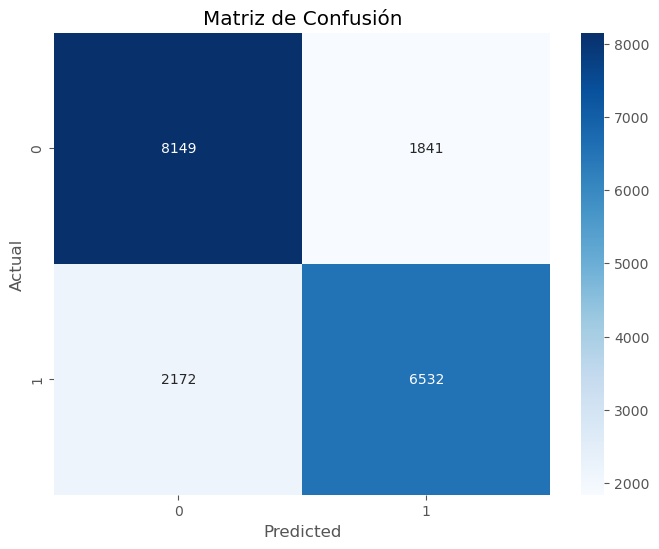

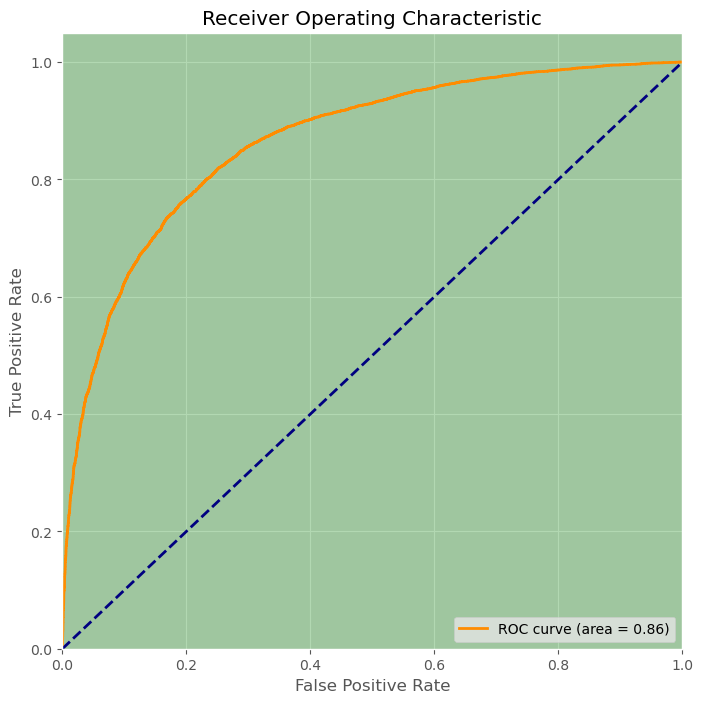

In [12]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una función para construir el modelo
def build_model(optimizer='adam', activation='relu', hidden_units=16):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Crear un clasificador Keras para usar con GridSearchCV
model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=32, verbose=0)

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])

# Entrenar el modelo con los parámetros específicos
pipeline.fit(X_train, y_train.loc[:,'seasonal_vaccine'])

# Realizar predicciones y obtener probabilidades continuas
y_pred = pipeline.predict(X_train)
y_prob = pipeline.predict_proba(X_train)[:, 1]  # Tomamos solo la columna correspondiente a la clase positiva

# Calcular el ROC AUC Score
roc_auc = roc_auc_score(y_train.loc[:,'seasonal_vaccine'], y_prob)

# Mostrar los resultados
print("ROC AUC Score:", roc_auc)

# Calcular la tabla de confusión
threshold = 0.5  # Umbral para clasificar como positivo o negativo
y_pred = (y_prob > threshold).astype(int)
conf_matrix = confusion_matrix(y_train.loc[:,'seasonal_vaccine'], y_pred)

# Mostrar la tabla de confusión con colores
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_train.loc[:,'seasonal_vaccine'], y_prob)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Calcular los puntos de TP y TN
threshold = 0.5  # Umbral para clasificar como positivo o negativo
y_pred = (y_prob > threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_train.loc[:,'seasonal_vaccine'], y_pred).ravel()

# Agregar los rectángulos de TP y TN al gráfico
plt.gca().add_patch(plt.Rectangle((0, 0), fp, tn, color="green", alpha=0.3, label='True Negatives'))
plt.gca().add_patch(plt.Rectangle((fp, tn), tp, fn, color="red", alpha=0.3, label='True Positives'))

# Mostrar el gráfico
plt.show()